In [1]:
def printHeader(x):
    print("**************************************************************************************************************")
    print(x)
    print("**************************************************************************************************************")
    print('\n')
    

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [3]:
import os
os.getcwd()

'C:\\Users\\anthea.guerra\\OneDrive - Accenture\\Desktop\\2019\\Big Data Studies\\CEBD1160\\A5'

In [4]:
printHeader('Create data frames:')
df = pd.read_csv('diabetes.csv')
print('Basic data frame:\tdf')
df_1 = df[df.SEX == 1] 
df_2 = df[df.SEX == 2]
print('Data frames by gender:\tdf_1, df_2')
df.info()
df_1.info()
df_2.info()


**************************************************************************************************************
Create data frames:
**************************************************************************************************************


Basic data frame:	df
Data frames by gender:	df_1, df_2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
AGE    442 non-null int64
SEX    442 non-null int64
BMI    442 non-null float64
BP     442 non-null float64
S1     442 non-null int64
S2     442 non-null float64
S3     442 non-null float64
S4     442 non-null float64
S5     442 non-null float64
S6     442 non-null int64
Y      442 non-null int64
dtypes: float64(6), int64(5)
memory usage: 38.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 441
Data columns (total 11 columns):
AGE    235 non-null int64
SEX    235 non-null int64
BMI    235 non-null float64
BP     235 non-null float64
S1     235 non-null int64
S2     2

In [5]:
printHeader('Identifying the attributes most strongly correlated with diabetes outcome.')
X='Y'
df_corr = df.corr()[X][:-1] 
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There is strong correlation with", X, "as follows: {}\n{}".format(len(golden_features_list), golden_features_list))

**************************************************************************************************************
Identifying the attributes most strongly correlated with diabetes outcome.
**************************************************************************************************************


There is strong correlation with Y as follows: 2
BMI    0.586450
S5     0.565883
Name: Y, dtype: float64


In [6]:
printHeader('Since BMI is the most strongly correlated attribute, create a new data frame \'df_w\' containing new column \'Weight\' to group records by BMI category')

df_w = pd.read_csv('diabetes.csv') #Create a new data frame called "dg_w"

BMI_Cat = []

for i in df_w["BMI"]:
    if i < 19:
        BMI_Cat.append('Underweight')
    elif i > 25:
        BMI_Cat.append('Overweight')
    else:
        BMI_Cat.append('Normal weight')
        
df_w["Weight"]=BMI_Cat
df_w.info()
df.info()



**************************************************************************************************************
Since BMI is the most strongly correlated attribute, create a new data frame 'df_w' containing new column 'Weight' to group records by BMI category
**************************************************************************************************************


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 12 columns):
AGE       442 non-null int64
SEX       442 non-null int64
BMI       442 non-null float64
BP        442 non-null float64
S1        442 non-null int64
S2        442 non-null float64
S3        442 non-null float64
S4        442 non-null float64
S5        442 non-null float64
S6        442 non-null int64
Y         442 non-null int64
Weight    442 non-null object
dtypes: float64(6), int64(5), object(1)
memory usage: 41.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 colu

**************************************************************************************************************
Plot 1: Correlation matrix
**************************************************************************************************************




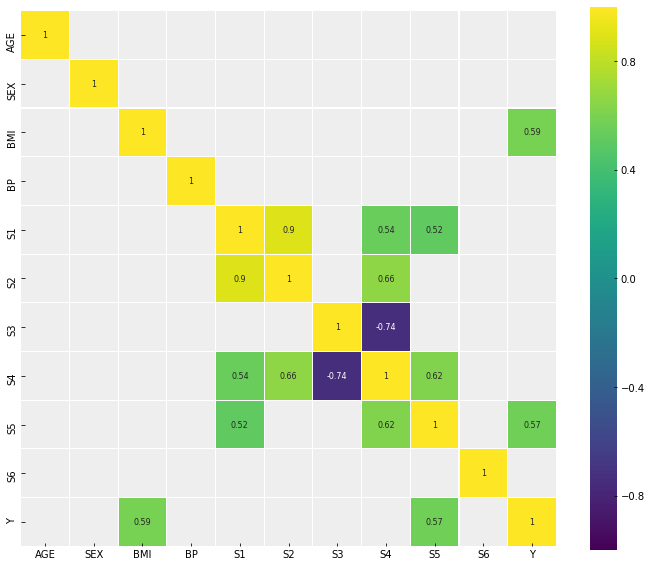

In [7]:
printHeader('Plot 1: Correlation matrix')

corr = df_w.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

**************************************************************************************************************
Plot 2: Histogram through the 'sns.distplot' utility:
**************************************************************************************************************


Features: Addition of rug, removal of normal distribution, manipulation of bin count, new colour


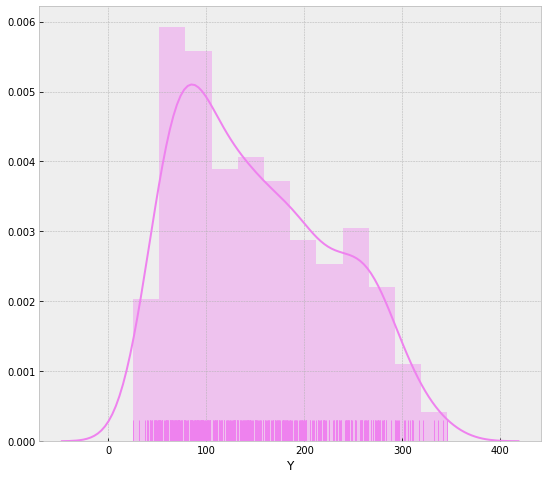

In [8]:
printHeader('Plot 2: Histogram through the \'sns.distplot\' utility:')
print('Features: Addition of rug, removal of normal distribution, manipulation of bin count, new colour')

plt.figure(figsize=(9, 8))
sns.distplot(df['Y'], color='violet', bins=12, rug=True, norm_hist=False);

**************************************************************************************************************
Plot 3: Overalapping histograms through the 'plt.hist()' utility
**************************************************************************************************************


Features: Multiple plots in the same figure, legend, colour


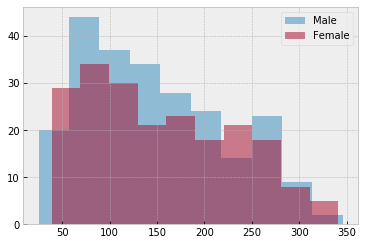

In [9]:
printHeader('Plot 3: Overalapping histograms through the \'plt.hist()\' utility')
print('Features: Multiple plots in the same figure, legend, colour')

plt.hist(df_1['Y'], label='Male', alpha=0.5)
plt.hist(df_2['Y'], label='Female', alpha=0.5)
plt.legend(loc='best')
plt.show()

**************************************************************************************************************
Plots 4-14: Pairplots mapping diabetes outcome as a function of each attribute:
**************************************************************************************************************


Features: Multiple plots in the same figure, use of the 'hue' parameter to group data points by gender, manipulation of column count in layout


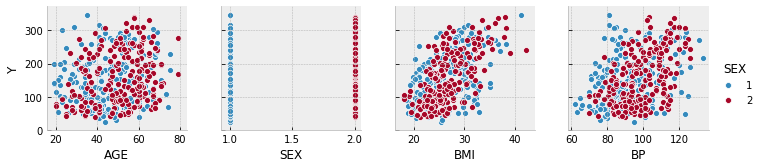

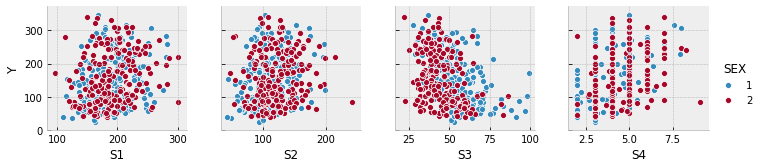

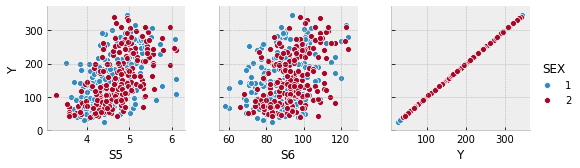

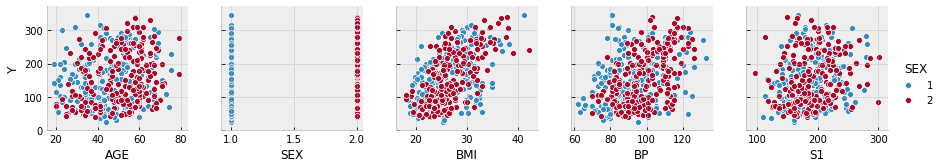

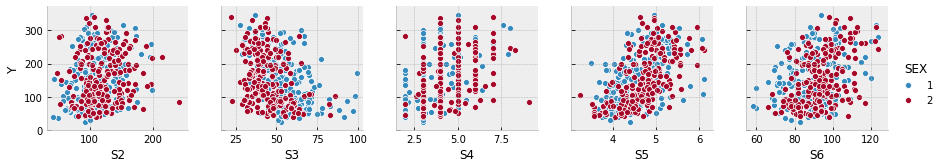

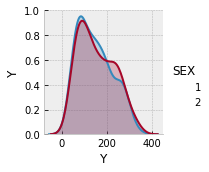

In [10]:
printHeader('Plots 4-14: Pairplots mapping diabetes outcome as a function of each attribute:') 
print('Features: Multiple plots in the same figure, use of the \'hue\' parameter to group data points by gender, manipulation of column count in layout') 
for i in range(0, len(df.columns), 4): #column count of 4
    sns.pairplot(data=df,
                 x_vars=df.columns[i:i+4],
                 y_vars=['Y'],hue='SEX')
    
for i in range(0, len(df.columns), 5): #column count of 5 yields a different outcome for the Y vs Y pair plot
    sns.pairplot(data=df,
                 x_vars=df.columns[i:i+5],
                 y_vars=['Y'],hue='SEX')


**************************************************************************************************************
Plot 15: Overlappig regression plots of diabetes outcome as a function of age for males and females
**************************************************************************************************************


Features: multiple plots in the same axes, legend, colour, markers


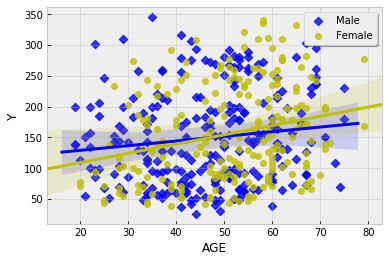

In [11]:
printHeader('Plot 15: Overlappig regression plots of diabetes outcome as a function of age for males and females')
print('Features: multiple plots in the same axes, legend, colour, markers')


sns.regplot(x='AGE', y='Y', data=df_1, ci=100, color='b', marker=('D'), label='Male')
sns.regplot(x='AGE', y='Y', data=df_2, ci=100, color='y', label='Female')
plt.legend(loc='best',shadow=True)
plt.show()

**************************************************************************************************************
Plots 16-39:  Applying lmplot for each attribute grouped by BMI category
**************************************************************************************************************


Features: Mutiple plots in the same figure, confidence interval, x_jitter parameter


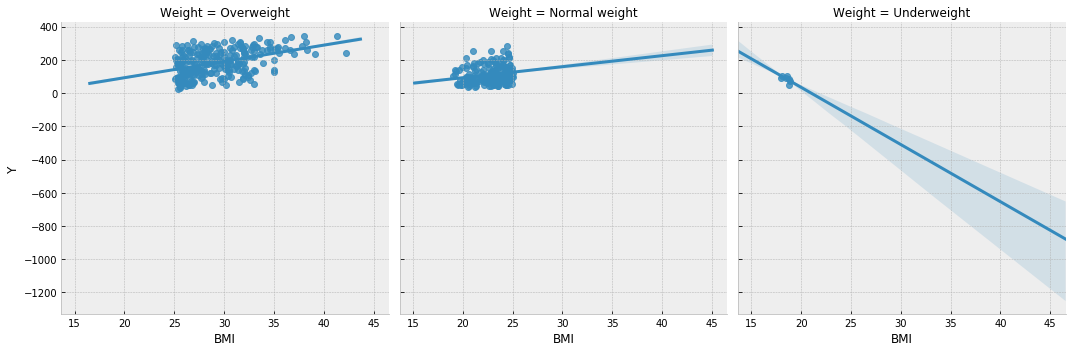

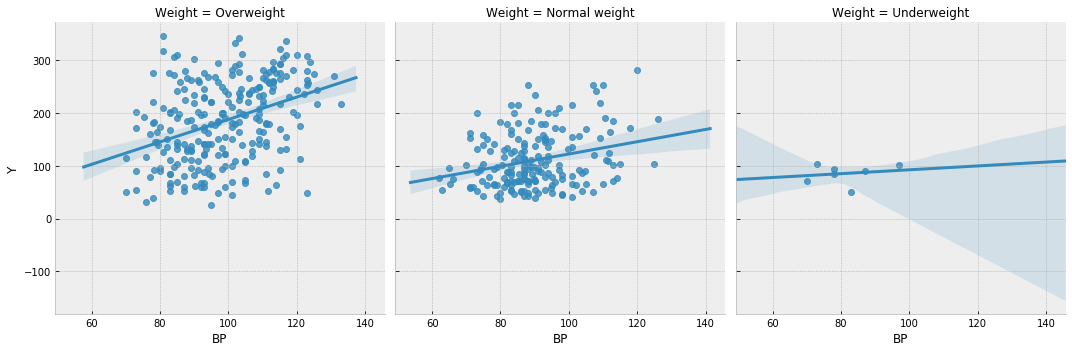

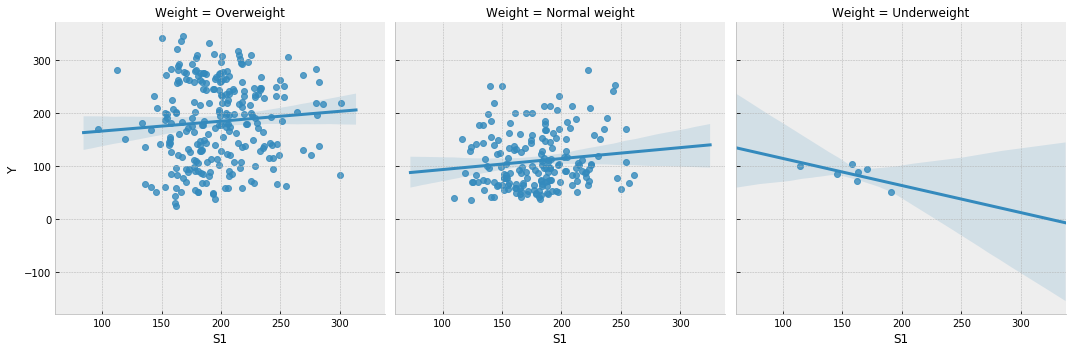

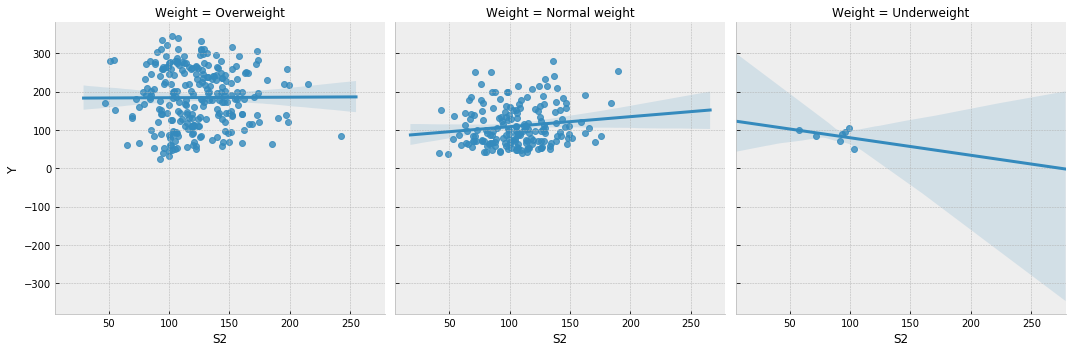

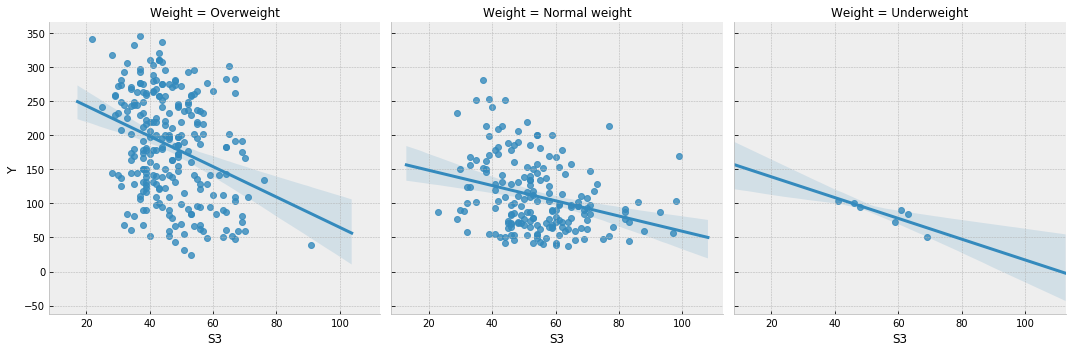

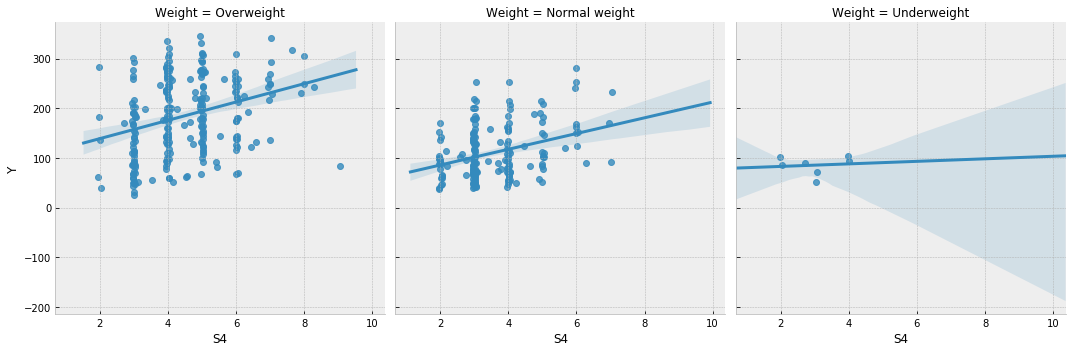

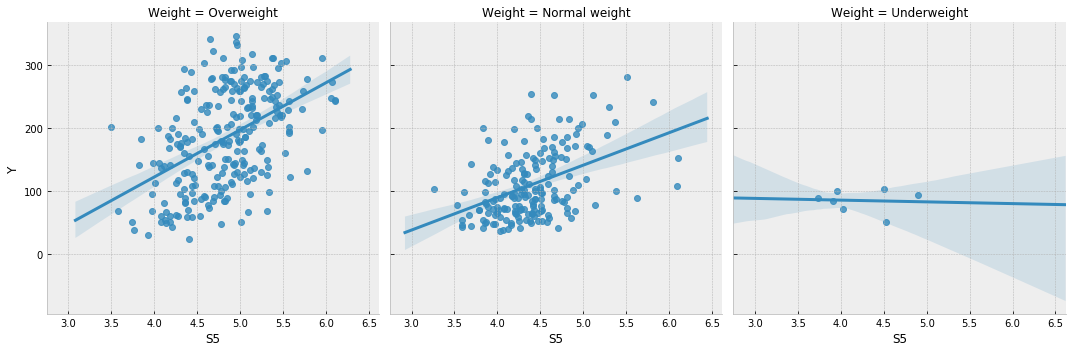

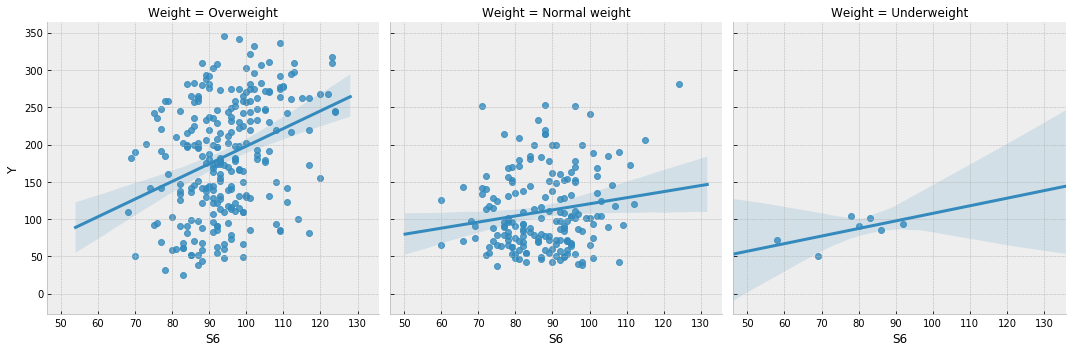

In [12]:
printHeader('Plots 16-39:  Applying lmplot for each attribute grouped by BMI category')
print('Features: Mutiple plots in the same figure, confidence interval, x_jitter parameter')

sns.lmplot('BMI', 'Y', data=df_w, col='Weight', ci=50)
sns.lmplot('BP', 'Y', data=df_w, col='Weight')
sns.lmplot('S1', 'Y', data=df_w, col='Weight')
sns.lmplot('S2', 'Y', data=df_w, col='Weight')
sns.lmplot('S3', 'Y', data=df_w, col='Weight')
sns.lmplot('S4', 'Y', data=df_w, col='Weight', x_jitter=0.05) # x_jitter parameter used to better distinguish between values in a discrete data set
sns.lmplot('S5', 'Y', data=df_w, col='Weight')
sns.lmplot('S6', 'Y', data=df_w, col='Weight')

plt.show()
plt.close()

**************************************************************************************************************
Plot 40:  Applying regression plot to compare the directly (S2->LDL) and inversely (S3->HDL) correlated cholesterol attributes against the diabetes outcome
**************************************************************************************************************


Features: Mutiple plots in the axes, confidence interval, colour, legend


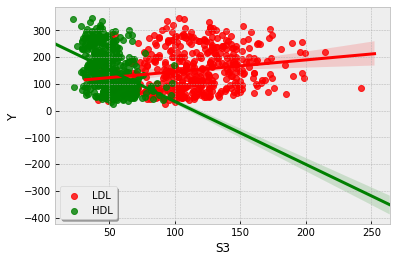

In [13]:
printHeader('Plot 40:  Applying regression plot to compare the directly (S2->LDL) and inversely (S3->HDL) correlated cholesterol attributes against the diabetes outcome')
print('Features: Mutiple plots in the axes, confidence interval, colour, legend')

sns.regplot(x='S2', y='Y', data=df, ci=100, color='r', label='LDL')
sns.regplot(x='S3', y='Y', data=df, ci=50, color='g', label='HDL')
plt.legend(loc='lower left',shadow=True)
plt.show()
plt.close()


**************************************************************************************************************
Plots 41-52:  Applying the line plot to each attribute.
**************************************************************************************************************


Features: Multiple plots in the same figure, figure size


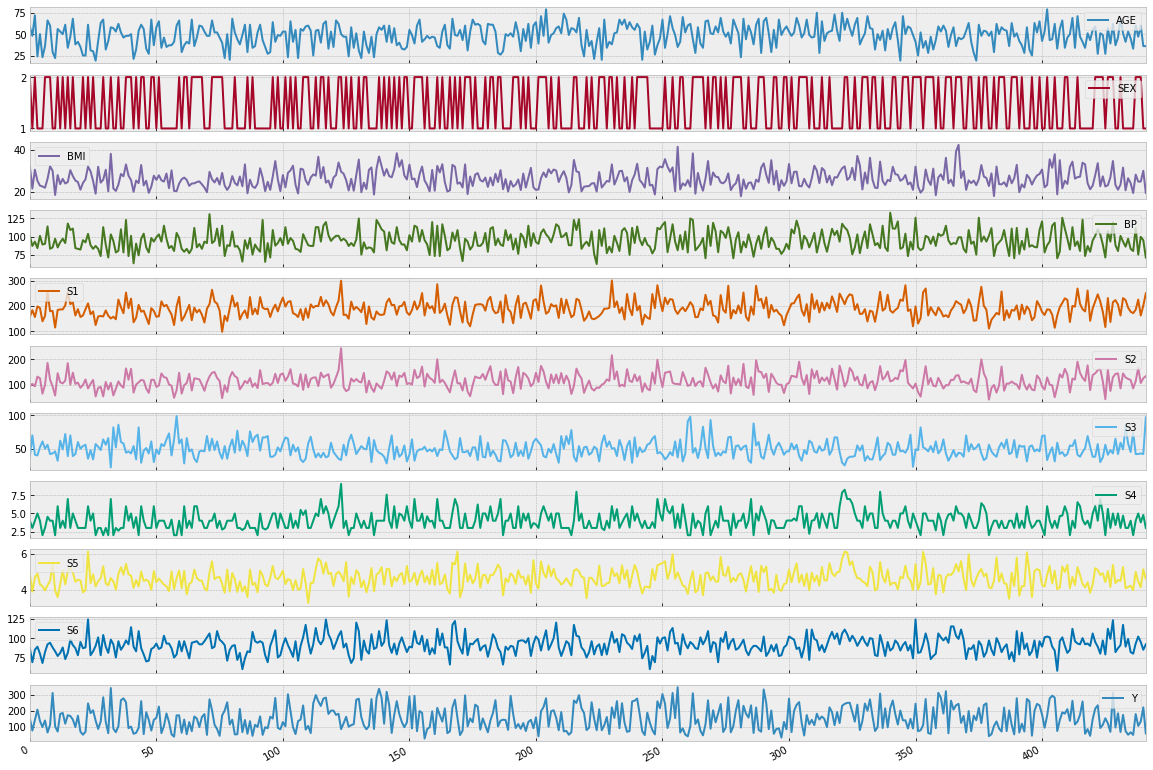

In [14]:
printHeader('Plots 41-52:  Applying the line plot to each attribute.')
print('Features: Multiple plots in the same figure, figure size')

axes=df.plot.line(figsize=(20, 15),subplots=True)
type(axes)
plt.show()



**************************************************************************************************************
Plot 53: 3D Scatter Plot
**************************************************************************************************************


Features: 3D visualtization, multiple plots on the same axes, legend, markers, colour


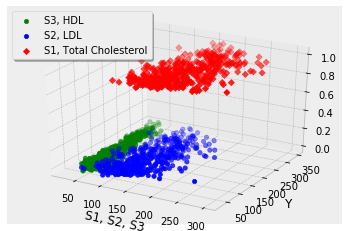

In [15]:
printHeader('Plot 53: 3D Scatter Plot')
print('Features: 3D visualtization, multiple plots on the same axes, legend, markers, colour')

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(df['S3'], df['Y'], np.zeros(442), c='g', marker='o', label='S3, HDL')
ax.scatter(df['S2'], df['Y'], np.zeros(442), c='b', marker='o', label='S2, LDL')
ax.scatter(df['S1'], df['Y'], np.ones(442), c='r', marker='D', label='S1, Total Cholesterol')

ax.set_xlabel('S1, S2, S3')
ax.set_ylabel('Y')

plt.legend(loc='best',shadow=True)
plt.show()
plt.close()



**************************************************************************************************************
Plot 54: 3D Bar Chart
**************************************************************************************************************


Features: 3D visualtization, multiple plots on the same axes, colour


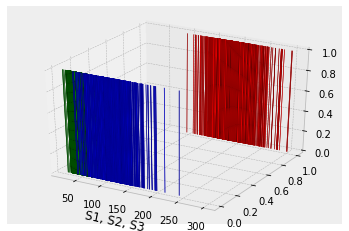

In [16]:
printHeader('Plot 54: 3D Bar Chart')
print('Features: 3D visualtization, multiple plots on the same axes, colour')

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


xpos = df['S3']
ypos = np.zeros(442)
zpos = np.zeros(442)

dx = np.ones(442)
dy = np.zeros(442)
dz = np.ones(442)

xpos1 = df['S2']
ypos1 = np.zeros(442)
zpos1 = np.zeros(442)

dx1 = np.ones(442)
dy1 = np.zeros(442)
dz1 = np.ones(442)

xpos2 = df['S1']
ypos2 = np.ones(442)
zpos2 = np.zeros(442)

dx2 = np.ones(442)
dy2 = np.zeros(442)
dz2 = np.ones(442)

ax.bar3d(xpos, ypos, zpos, dx, dy, dz,color='g')
ax.bar3d(xpos1, ypos1, zpos1, dx1, dy1, dz1,color='b')
ax.bar3d(xpos2, ypos2, zpos2, dx2, dy2, dz2,color='r')

ax.set_xlabel('S1, S2, S3')

plt.show()
plt.close()

**************************************************************************************************************
Plot 55: Grouped box plot of weight category against diabetes outcome
**************************************************************************************************************


Features: multiple plots on the same axes, colour


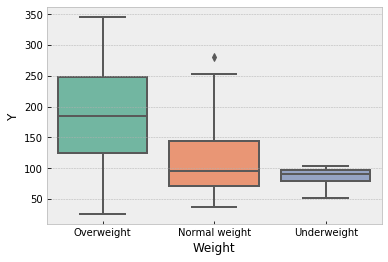

In [17]:
printHeader('Plot 55: Grouped box plot of weight category against diabetes outcome')
print('Features: multiple plots on the same axes, colour')

sns.boxplot(x="Weight", y="Y", data=df_w, palette="Set2")
plt.show()

